# API Overview

## Overview of seaborn plotting functions
- Seaborn의 주 사용 목적은 plot을 그리는 것 

- 튜토리얼 이후의 장에서는 각 함수에서 제공하는 특정 기능을 살펴볼 것 

- 이 장에서는 Seaborn을 사용하면서 접하게 될 다양한 종류의 함수를 개괄적으로 소개함

In [2]:
import seaborn as sns
%matplotlib inline
sns.set_theme()

## 유사한 작업, 유사한 기능
- Seaborn 네임스페이스는 "flat"함

- 모든 기능은 최상위 레벨에서 액세스할 수 있음

- 그러나 코드 자체는 서로 다른 수단을 통해 유사한 시각화 목표를 달성하는 함수 모듈로 계층 구조로 구성되어 있음

- 대부분의 문서는 이러한 모듈을 중심으로 구성되어 있음 ("관계형", "분산형" 및 "범주형"과 같은 이름을 접하게 될 것)

- 예를 들어 [distributions 모듈][1] 은 데이터 포인트의 분포를 나타내는 데 특화된 함수를 정의함

- 히스토그램이 친숙한 예시

"네임 스페이스가 flat하다." 라는 의미는 라이브러리 내부의 함수와 객체 구성을 묘사한 것

네임스페이스는 함수 이름, 클래스 이름 등을 저장하는 컨테이너이고, "flat한" 네임스페이스가 의미하는 것은 모든 식별자가 동일한 수준에 있기 때문에 엑세스하기 위해 일일이 라이브러리 계층 내에서 함수나 객체의 정확한 위치를 기억할 필요가 없다는 의미

이렇게 평평한 네임스페이스는 Seaborn이 추구하는 철학의 일부

[1]:https://seaborn.pydata.org/api.html#distribution-api

**`histplot()`**

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


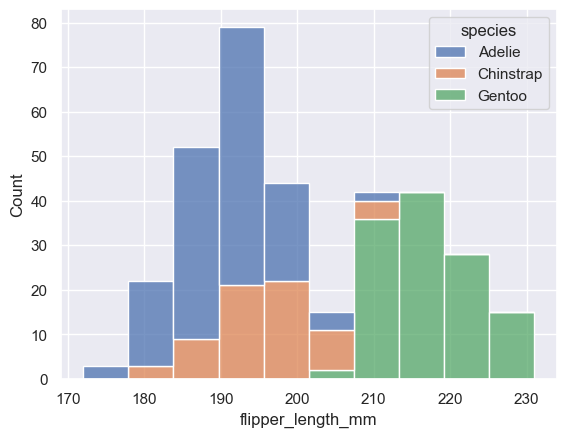

In [3]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

penguins

**`kdeplot()`**

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

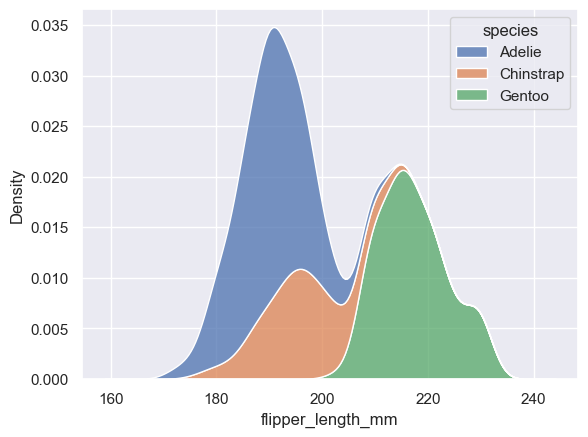

In [4]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

- 모듈 내의 함수들은 많은 기반 코드를 공유하며, 라이브러리의 다른 구성 요소에는 존재하지 않을 수 있는 유사한 기능을 제공함 (위의 예시에서는 `multiple="stack"`이 이에 해당함)

- 각 표현들은 상호보완적인 강점과 약점을 가지고 있기 때문에 Dataset을 탐색할 때 상호간에 쉽게 전환할 수 있도록 설계되었음

## Figure-level vs. axes-level functions
- 다양한 모듈 외에도 "axes-level" 또는 "Figure-level"에서 Seaborn 함수의 교차 분류가 있음 

- 위의 예시들은 axes-level 함수에 속하며, 함수의 반환 값인 단일 `matplotlib.pyplot.Axes` 개체에 데이터를 표시함

- 이와 대조적으로, Figure-level 함수는 보통 FacetGrid와 같은 Figure를 관리하는 Seaborn 객체를 통해 matplotlib와 interface함

- 각 모듈에는 다양한 axes-level 함수에 대한 통합된 인터페이스를 제공하는 단일 Figure-level 함수가 있음


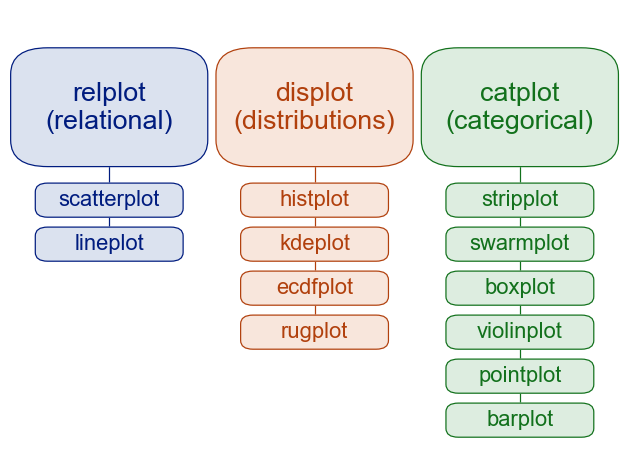

**`displot()`**
- distributions(분포) 모듈을 위한 figure-level 기능

- 기본적으로 히스토그램을 그리는 기능을 수행함

- 내부적으로는 `histplot()`과 같은 코드가 작동하고 있음

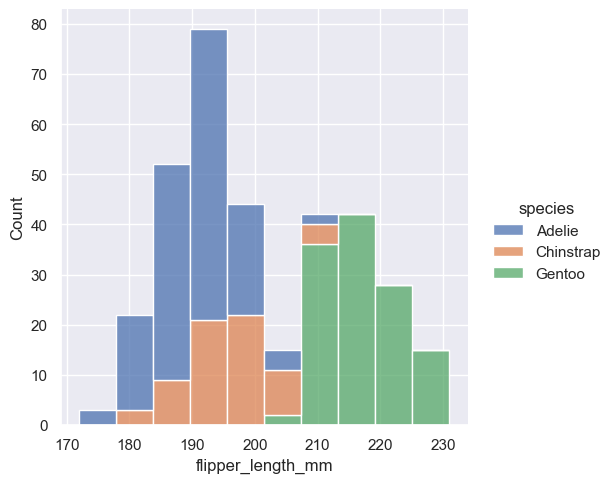

In [5]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

`displot(kind="kde")`
- 위와 비슷하지만 덜 친숙한, kde(커널 밀도 추정)와 같은 옵션도 있음

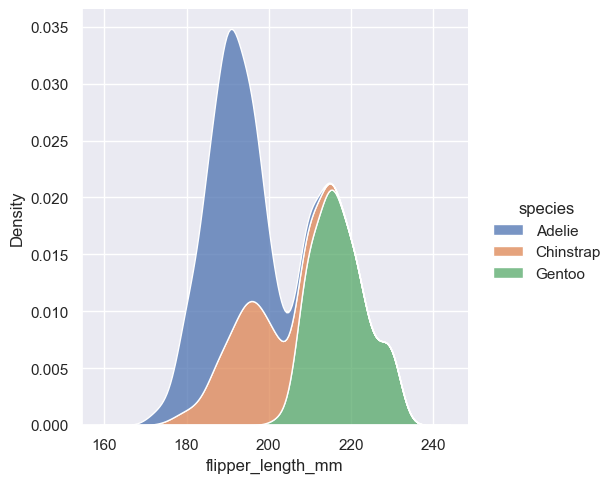

In [6]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

- figure-level plot은 axes-level plot과 거의 똑같아 보이지만, 약간의 차이점들이 존재함

- 눈에 띄게 범례가 플롯 밖에 위치해 있고, 약간 다른 모양을 하고 있기도 함

- figure-level 함수에서 제공되는 가장 유용한 기능은 다양한 subplot을 쉽게 생성할 수 있다는 것

- 그 예로, 펭귄의 서로 다른 종의 분포를 같은 axes(축)에 쌓는 대신, figure의 column(열)에 걸쳐 그려냄으로써 우리는 각 분포를 "facet(대면)" 할 수 있음

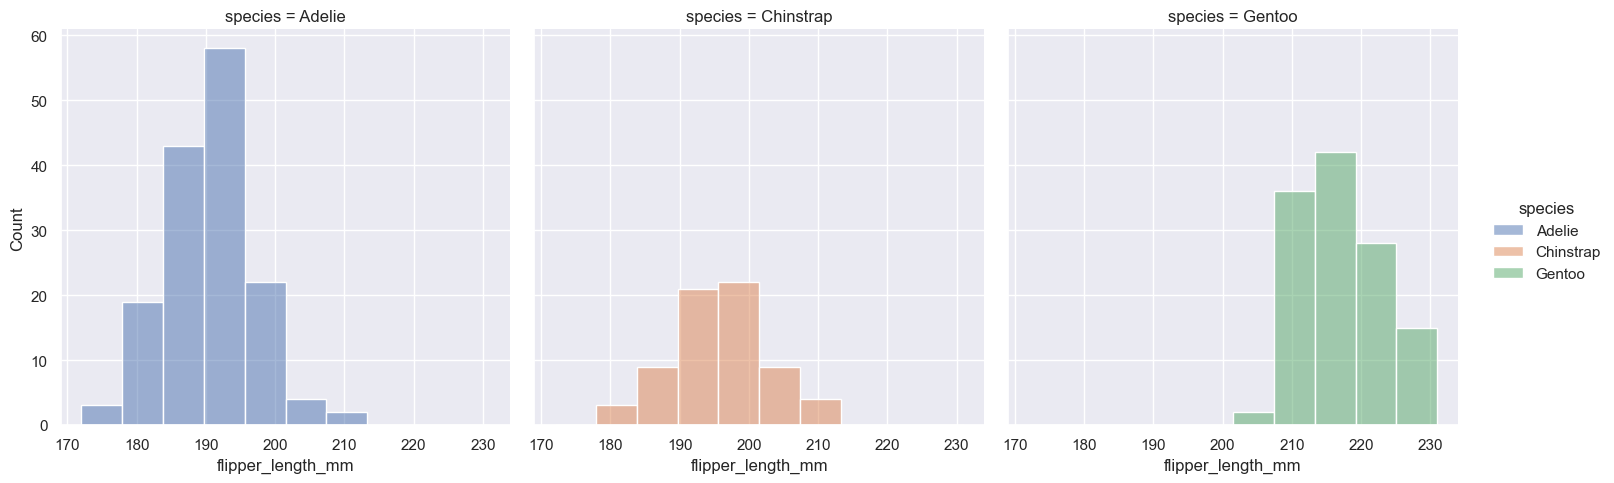

In [7]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

- figure-level의 함수들은 axes-level의 함수를 감싸고 히스토그램의 bin과 같은 종류별 keyword arguments를 기반 함수로 전달함

- 이러한 작동원리는 유연하지만, 단점도 존재함

- 종류별 parameters가 함수의 signature 나 docstring에 제시되지 않음

- 기능 중 일부는 검색이 어려울 수도 있고, 특정 목표를 달성하는 방법을 이해하기 전에 documentation의 다른 두 페이지를 번갈아 봐야하는 번거로움이 발생할 수도 있음

### Axes-level functions make self-contained plots
- Axes-level 함수는 matplotlib의 함수를 위한 [drop-in replacements][1]처럼 작동하도록 되어있음

- Axes label과 범례(legend)를 자동으로 추가하지만 그려지는 axes 이외의 항목은 수정하지 않음

- 즉, 예측 가능한 결과를 가진 임의의 복잡한 matplotlib 수치로 구성할 수 있음

- Axes-level 함수는 [`matplotlib.pyplot.gca()`][2]를 내부적으로 호출하여 matplotlib의 [state-machine][3] 인터페이스에 연결하여 "현재 활성" axes에 plot을 그림

- 그러나 `ax=` argument를 추가로 사용할 수 있으며, 이 argument를 사용하면 객체 지향 인터페이스와 통합되어 각 그래프의 위치를 정확하게 지정할 수 있음

[1]:https://en.wikipedia.org/wiki/Drop-in_replacement
[2]:https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html#matplotlib.pyplot.gca
[3]:https://www.itemis.com/en/products/itemis-create/documentation/user-guide/overview_what_are_state_machines

In [8]:
import matplotlib.pyplot as plt

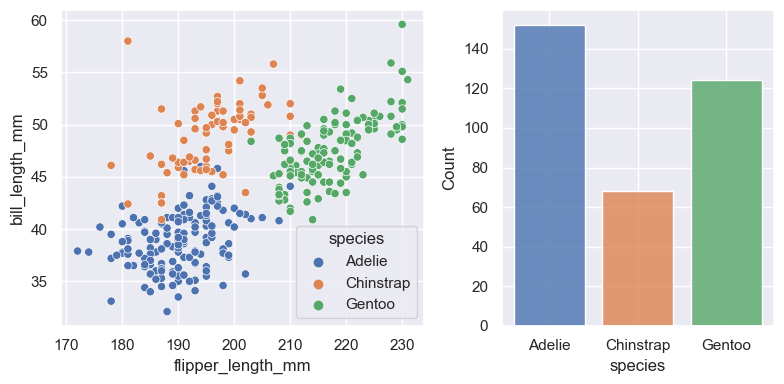

In [9]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

### Figure-level functions own their figure
- 반대로, Figure-level 함수는 다른 플롯과 쉽게 구성할 수 없음 

- 설계상 초기화를 포함하여 자신의 figure를 "소유"하므로 Figure-level 함수를 사용하여 기존 axes에 figure를 그리는 개념은 없음

- 이 제약 조건을 통해 Figure-level 함수는 범례(legend)를 plot 외부에 배치하는 것과 같은 기능을 구현할 수 있음

- 그럼에도 불구하고, Figure-level 함수가 반환하는 객체의 matplotlib axes에 엑세스하고 다른 요소들을 plot에 추가함으로써 Figure-level 함수가 제공하는 것 이상을 수행할 수 있음

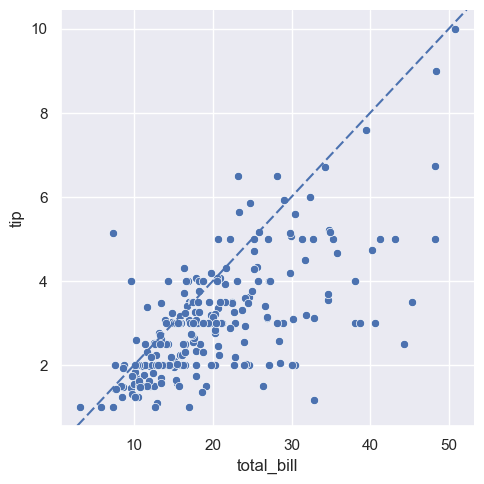

In [10]:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5,2))

### Customizing plots from a figure-level function
- Figure-level 함수는 [FacetGrid][1] 인스턴스(instance)를 반환하며, 여기에는 subplot 구성에 대해 "스마트"한 방식으로 plot의 속성(attribute)을 커스텀하는 몇 가지 방법이 있음

- 예를 들어 한 줄의 코드를 사용하여 외부 axes의 label을 변경할 수 있음

- 이 방법은 편리하지만, matplotlib API의 일부가 아니며 Figure-level 함수를 사용할 때만 존재한다는 점을 기억해야 한다는 점에서 다소 복잡하기도 함

[1]:https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid

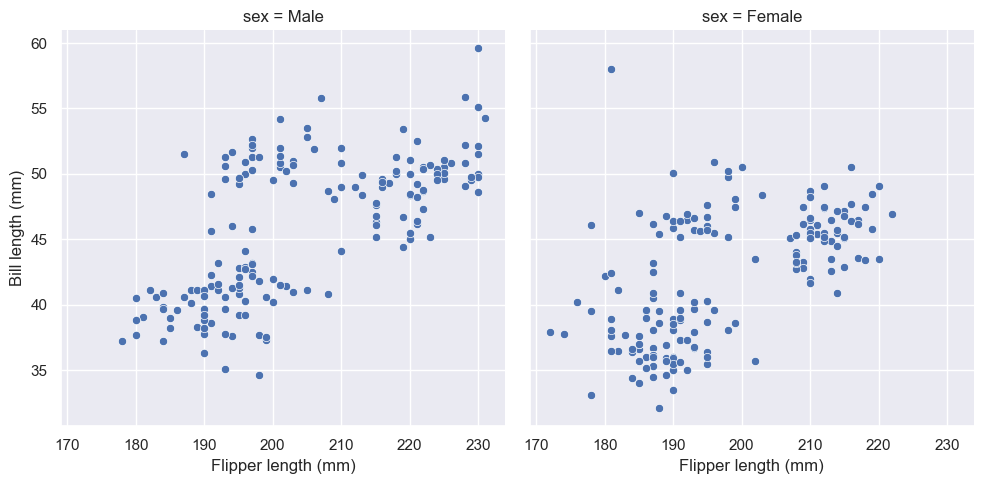

In [11]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

### Specifying figure sizes
matplotlib plot의 크기를 늘리거나 줄이려면 plot을 설정하는 동안(예: [`matplotlib.pyplot.subplots()`][1]의 `figsize` parameter 사용) [global rcParams][2]에서 전체 그림의 너비와 높이를 설정하거나 Figure 객체(예: `matplotlib.Figure.set_size_inches()`)에서 메서드(method)를 호출함

Seaborn에서 axes-level 함수를 사용할 때 동일한 규칙이 적용됨

plot의 크기는 plot이 속한 figure의 크기와 해당 figure의 axes 레이아웃에 따라 결정됨

Figure-level 함수를 사용할 때 몇 가지 주요 차이점이 있음 

- 첫째, 함수 자체에는 figure size를 제어하는 parameter가 있음 (실제로는 그림을 관리하는 기본 FacetGrid의 parameter). 

- 둘째, `height` 및 `aspect` parameter는 matplotlib의 `width`, `height` parameterization과 약간 다르게 size를 parameterization함 (Seaborn parameter 사용, `width` = `height` * `aspect`). 

- 가장 중요한 것은 parameter가 전체 figure의 size가 아니라 각 subplot의 size에 해당한다는 것

- 이러한 접근 방식의 차이점을 설명하기 위해 아래는 하나의 subplot이 있는 `matplotlib.pyplot.subplots()`의 기본 출력 과정을 보여줌

[1]:https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots
[2]:https://matplotlib.org/stable/tutorials/introductory/customizing.html

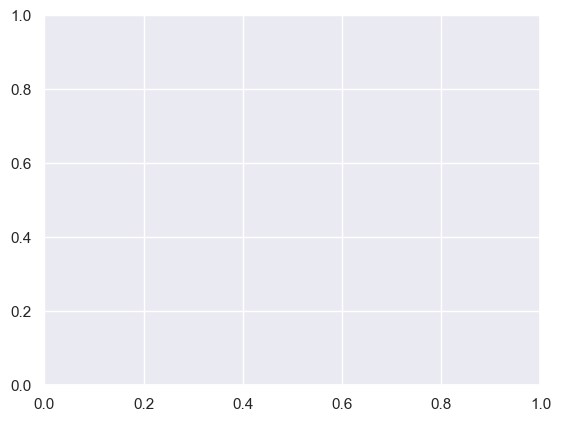

In [12]:
f, ax = plt.subplots()

column이 여러 개인 figure는 전체 size가 같지만 axes는 공간에 맞게 가로로 압축됨

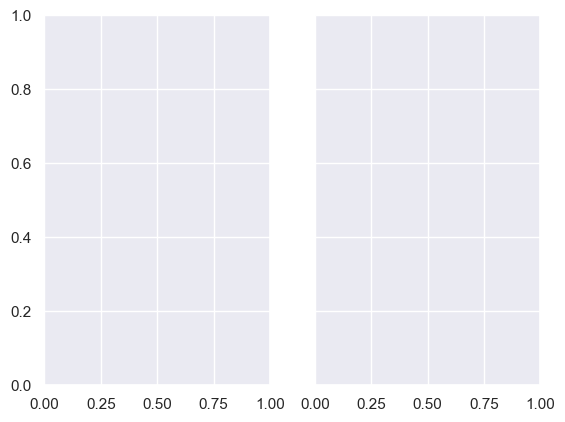

In [13]:
f, ax = plt.subplots(1, 2, sharey=True)

반대로 Figure-level 함수로 만든 플롯은 정사각형이 됨

이를 시연하기 위해 [FacetGrid][1]를 직접 사용하여 빈 플롯을 설정 

이것은 [`replot()`][2], [`displot()`][3] 또는 [`catplot()`][4]과 같은 함수의 기저에서 실행됨

[1]:https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
[2]:https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot
[3]:https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot
[4]:https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

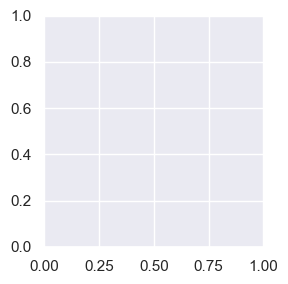

In [14]:
g = sns.FacetGrid(penguins)

column이 추가되면 figure 자체가 더 넓어져서 subplot의 크기와 모양이 동일해짐

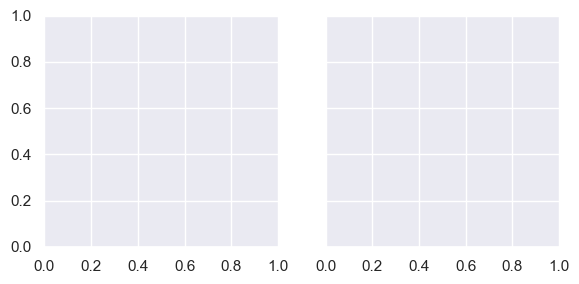

In [15]:
g = sns.FacetGrid(penguins, col="sex")

그리고 figure의 총 rows과 columns의 수를 고려하지 않고 각 subplot의 크기와 모양을 조정할 수도 있음

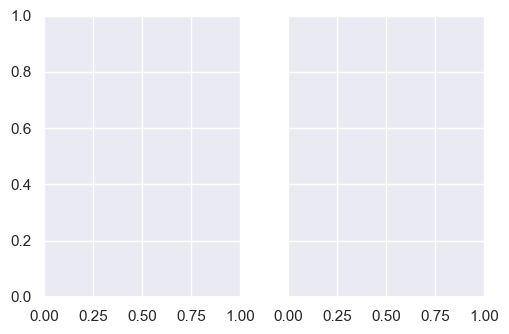

In [16]:
g = sns.FacetGrid(penguins, col="sex", height=3.5, aspect=.75)

결론은 전체 figure size를 조정하는 방법에 대해 생각하기 위해 멈추지 않고 Facet 변수를 할당할 수 있다는 것

단점은 figure size를 변경하려는 경우 matplotlib에서와 약간 다르게 작동한다는 점을 기억해야 한다는 것

### Relative merits of figure-level functions
위에서 설명한 figure-level 함수의 장단점을 요약하면 다음과 같음

장점
- 데이터 변수에 의한 손쉬운 Faceting
- 기본적으로 플롯의 밖에 있는 범례
- figure-level의 쉬운 커스텀
- 다양한 figure size parameterization

단점
- 함수 signature에 없는 많은 parameter
- 더 큰 matplotlib 그림의 일부가 될 수 없음
- matplotlib과 다른 API
- 다양한 figure size parameterization

전반적으로, figure-level 함수는 초보자에게 일을 더 혼란스럽게 만들 수 있는 약간의 복잡성이 있지만 고유한 기능은 힘이 되기도 함

튜토리얼 문서는 비교적 깔끔한 plot을 생성하기 때문에 대부분 figure-level 함수를 사용하며 일반적으로 대부분의 응용 프로그램에서도 사용하는 것을 권장 

좋은 선택이 아닌 한 가지 상황은 여러 다른 plot의 종류를 구성하는 복잡하고 독립형 figure를 만들어야 하는 경우 

이 시점에서 matplotlib를 사용하여 직접 Figure를 설정하고 axes-level 함수를 사용하여 개별 구성 요소를 채우는 것이 좋음

## Combining multiple views on the data
Seaborn의 두 가지 중요한 Plotting 기능은 위에서 설명한 분류 체계에 깔끔하게 맞지 않음

이러한 함수 [`jointplot()`][1]및 [`pairplot()`][2]는 서로 다른 모듈의 여러 종류의 plot을 사용하여 Dataset의 여러 측면을 단일 figure로 나타냄

두 plot 모두 figure-level 함수이며 기본적으로 여러 subplot이 있는 figure를 생성함

그러나 figure를 관리하기 위해 서로 다른 개체를 사용함 ([`JointGrid`][3], [`PairGrid`][4])

[1]:https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot
[2]:https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot
[3]:https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid
[4]:https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid

[**`jointplot()`**][5]
- 각 변수의 단변량 분포를 개별적으로 보여주는 주변 axes을 추가하면서 두 변수의 관계 또는 공동 분포를 Plotting함

[5]:https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot

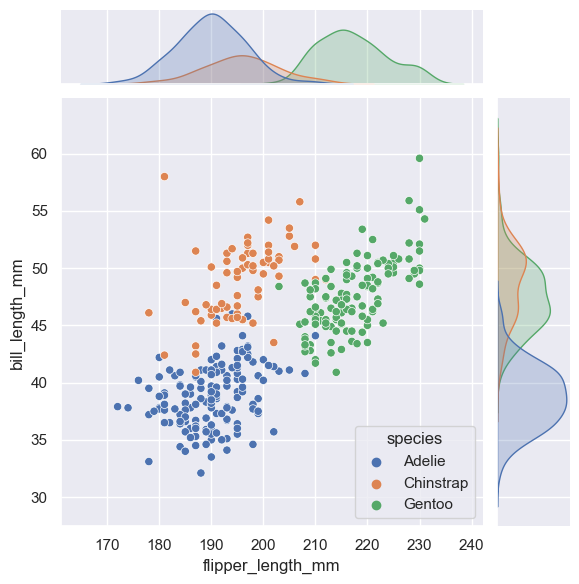

In [17]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

[**`pairplot()`**][1]
- 위와 유사함(joint와 marginal view를 결합)

- 그러나 단일 관계에 초점을 맞추기보다는 변수의 모든 쌍별 조합을 동시에 시각화합니다.

[1]:https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

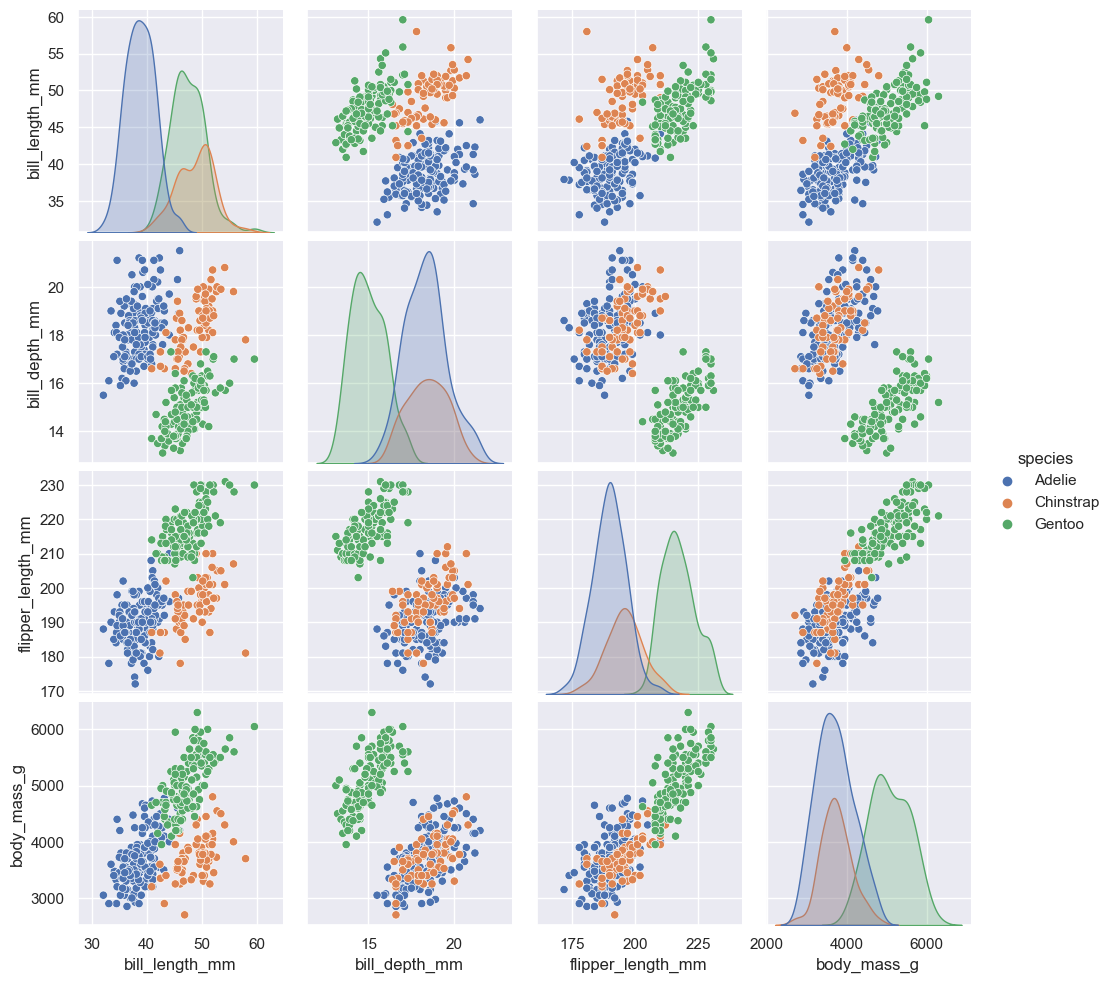

In [18]:
sns.pairplot(data=penguins, hue="species")

기저에서, 이미 위에서 만난 axes-level 함수를 사용하는 이 기능들은([`scatterplot()`][1]및 [`kdeplot()`][2]) `kind` parameter를 사용하여 다른 표현으로 신속하게 교체할 수 있음

[1]:https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot
[2]:https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot

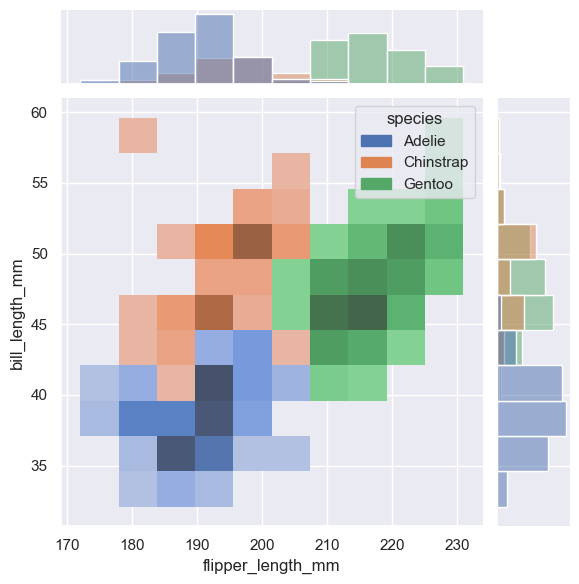

In [19]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="hist")

## Seaborn에서 허용하는 데이터 구조
- Seabron은 데이터 시각화 라이브러리로써 데이터를 필요로 함

- 이번 챕터에서는 해당 작업을 수행하는 다양한 방법을 설명함

- Seaborn은 여러가지 Dataset 형식을 지원하며, 대부분의 함수는 list, dict와 같은 내장 Ptyhon 유형 뿐 만 아니라 pandas나 numpy 라이브러리의 객체로 표현된 데이터도 허용함

- 이러한 다양한 옵션과 관련된 사용패턴을 이해하면 거의 모든 Dataset에 대한 유용한 시각화를 빠르게 만드는 데에 도움이 됨

작성 버전(v0.11.0): 현재 여기에서 다루는 전체 옵션은 seaborn 모듈의 하위 집합(즉, 관계형 및 배포 모듈)에서만 지원됨

다른 모듈은 대부분 동일한 유연성을 제공하지만 몇 가지 예외가 있음
(예: catplot()과 lmplot()은 명명된 변수가 있는 긴 형식 데이터로 제한됨)

데이터 수집 코드는 다음 몇 번의 릴리스 주기에 걸쳐 표준화될 예정이지만 그 시점까지는 Dataset에서 기대한 대로 작동하지 않는 경우 각 기능에 대한 특정 문서를 염두에 두어야 함

### Long-form vs. Wide-form data
- 대부분의 Seaborn의 plotting 함수들은 벡터 데이터를 지향

- x와 그에 대응하는 y를 plotting할 때, 각 변수는 벡터이어야 함

- Seaborn은 일부 표 형식으로 구성된 둘 이상의 벡터가 있는 데이터 set를 허용

- Long-form과 Wide-form 데이터 테이블 사이에는 근본적인 차이가 있으며, Seaborn은 이를 각각 다르게 취급함

**Long-form data**

Long-form 데이터 테이블의 특징

- 각 변수는 column(열)

- 각 관측치는 row(행)

간단한 예로, 1949년부터 1960년까지 매달 비행기를 탄 승객 수를 기록한 "flights" Dataset를 들 수 있음

이 Dataset에는 3개의 변수(year, month, number of passenger)가 있음

In [20]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Long-form 데이터를 사용하면 테이블의 column을 변수 중 하나에 명시적으로 할당하여 plot에서 역할이 부여됨

예를 들어, 연간 승객 수의 월별 도표를 작성하면 다음과 같음

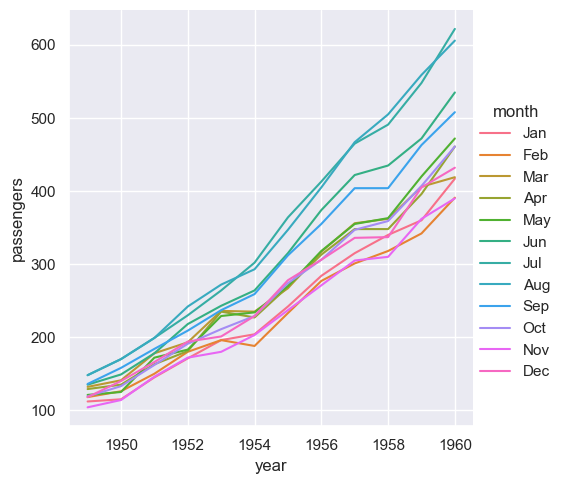

In [21]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

Long-form 데이터의 장점은 plot의 명시적 설계에 적합하다는 것

변수와 관측치가 명확하게 정의될 수 있는 경우에 한해 임의의 복잡한 Dataset를 수용할 수 있음

그러나 이 format은 머리 속에 있는 데이터의 모델이 아닌 경우가 많기 때문에 익숙해지는 데 시간이 걸림

**Wide-form data**

간단한 Dataset의 경우 column과 row에 다양한 변수가 포함된 스프레드 시트에서 데이터를 보는 방식으로 데이터를 생각하는 것이 더 직관적인 경우가 많음

예를 들어 "flights" Dataset를 "pivoting"하여 Wide-form 데이터 구조로 변환하여 각 column에 연도별 월별 시계열이 포함되도록 할 수 있음

In [22]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


여기에는 동일한 세 가지 변수가 있지만 다르게 구성되어 있음

Dataset의 변수는 명시된 필드가 아닌 테이블의 차원에 연결됨

각 관측치는 테이블의 셀에 있는 값과 row, column, index에 대한 해당 셀의 좌표로 정의됨

Long-form 데이터를 사용하면 변수의 이름으로 Dataset의 변수에 접근할 수 있지만, Wide-form 데이터의 경우에는 그렇지 않음

그럼에도 불구하고 테이블의 차원과 Dataset의 변수 간에 명확한 연관성이 있기 때문에 Seaborn은 plot에서 이러한 변수 역할을 할당할 수 있음

Seaborn은 x와 y가 할당되지 않은 경우 데이터에 대한 arguments를 Wide-form으로 처리함

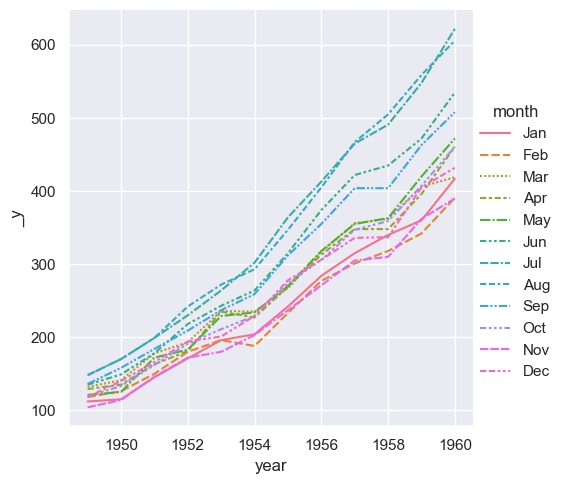

In [23]:
sns.relplot(data=flights_wide, kind="line")

이 plot은 이 전의 것과 매우 유사해 보이지만

Seaborn은 데이터프레임의 index를 x에, value를 y에 할당하고, 각 월별로 개별 line을 그린 것임

그러나 두 plot 사이에는 눈에 띄는 차이가 있음

- Dataset를 Long-form에서 Wide-form으로 "pivotting"하는 작업을 거친 후, value의 의미에 대한 정보가 손실됨

- 결과적으로 y축의 label이 없음 (relplot()이 column 변수를 색상 및 스타일 시맨틱 모두에 매핑하여 그래프에 더 쉽게 접근할 수 있도록 했기 때문에 선에 dash가 있음. Long-form의 경우에는 하지 않았지만 style="month"를 설정하면 적용할 수 있음)

지금까지 우리는 Wide-form 데이터를 사용하면서 타이핑을 훨씬 적게 했고, 거의 같은 plot을 생성했음

이 방법이 더 간편해 보이지만 Long-form 데이터의 큰 장점은 데이터를 올바른 형식으로 가지고 있으면 더 이상 구조에 대해 생각할 필요가 없다는 것

plot에 포함된 변수에 대해서만 생각하여 plot을 디자인할 수 있음

예를 들면, 각 연도의 월별 시계열을 나타내는 선을 그리려면 간단히 변수를 재할당하기만 하면 됨

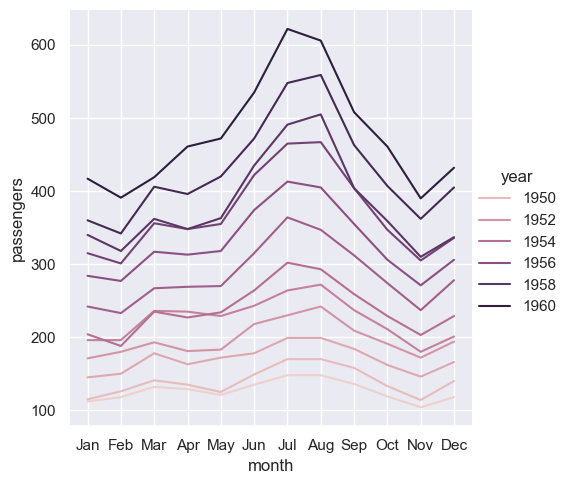

In [24]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

Wide-form Dataset으로 동일한 리매핑을 하려면 테이블을 transpose 해야 함

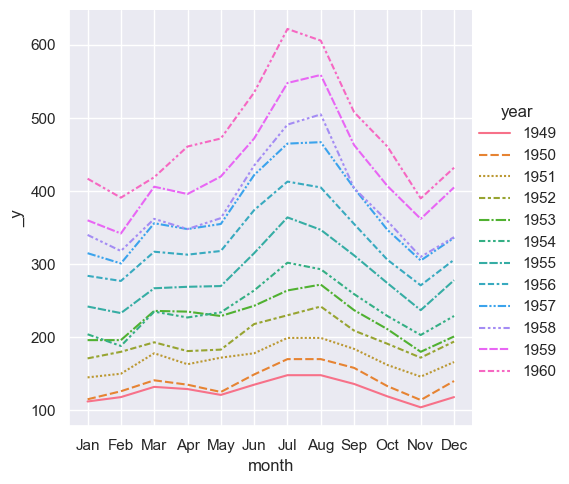

In [25]:
sns.relplot(data=flights_wide.transpose(), kind="line")

(이 예시 또한 dash가 나타남. 즉, Seaborn은 현재 데이터 유형에 관계없이 Wide-form Dataset의 column 변수를 categorical(범주형)으로 간주하는 반면, Long-form 변수는 numeric(숫자)이기 때문에 정량적 색상 팔레트와 legend(범례)가 할당되고 향후 변경할 수도 있음)

명시적인 변수 할당이 없다는 것은 각 plot의 유형이 Wide-form 데이터의 차원과 plot의 역할 간에 고정 매핑을 정의해야 함을 의미함

이 자연스러운 매핑은 plot의 유형에 따라 다를 수 있으므로 Wide-form 데이터를 사용할 때 결과를 예측하기 어려움

예를 들어, 범주형 plot들은 테이블의 column을 x에 할당한 다음 row 전체에 걸쳐 집계함
(index는 무시됨)

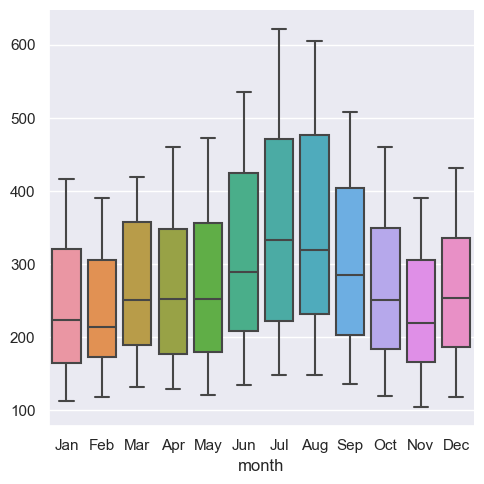

In [26]:
sns.catplot(data=flights_wide, kind="box")

Wide-form 데이터를 표현하기 위해 pandas를 사용하는 경우 몇 가지 변수(3개 이하)로 제한됨

이는 Seaborn이 pandas가 테이블 형식으로 추가 변수를 나타내는 방식인 multi-index 정보를 사용하지 않기 때문

xarray 프로젝트는 Wide-form 데이터를 더 높은 차원으로 일반화한 것으로 간주할 수 있는 labe이 지정된 N차원 array 객체를 제공함

현재 Seaborn은 xarray의 객체를 직접 지원하지 않지만 to_pandas 메서드를 사용하여 long-form pandas.DataFrame으로 변환한 다음 다른 long-form Dataset와 마찬가지로 seaborn에서 plotting 할 수 있음

요약하면 Long-form과 Wide-form Dataset를 다음과 같이 생각할 수 있음

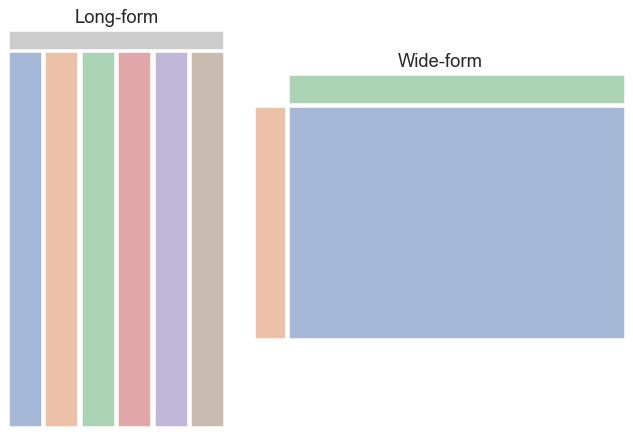

### Messy data
- Long-form 또는 Wide-form 규칙을 사용하여 많은 Dataset를 명확하게 해석할 수 없음

- 명확하게 Long-form 또는 Wide-form의 Dataset가 "tidy(깔끔)" 하다면 이러한 더 모호한 Dataset는 "messy(지저분하다)"고 말할 수 있음

- 지저분한 Dataset에서 변수는 키나 테이블 차원에 의해 고유하게 정의되지 않음

- 이는 각 행이 데이터 수집 단위에 해당하도록 테이블을 구성하는 것이 자연스러운 반복 측정 데이터에서 종종 발생함

- 20명의 피험자가 주의를 분산시키거나 집중하는 동안 애너그램을 연구하는 기억 작업을 수행한 심리학 실험의 이 간단한 Dataset를 참고

In [27]:
anagrams = sns.load_dataset("anagrams")
anagrams

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8
5,6,divided,5,5.0,6
6,7,divided,5,4.5,6
7,8,divided,5,7.0,8
8,9,divided,2,3.0,7
9,10,divided,6,5.0,6


- 주의 변수는 피험자 간 이지만 피험자 내 변수도 있음

- 애너그램에 대한 가능한 솔루션의 수는 1에서 3까지 다양함

- 종속 척도는 메모리 성능 점수

- 이 두 변수(숫자 및 점수)는 여러 column에서 공동으로 인코딩됨

- 결과적으로 전체 Dataset는 명확하게 Long-form도 명확하게 Wide-form도 아님

주의와 솔루션 수의 함수로 평균 점수를 Plotting하도록 Seaborn에게 어떻게 지시할 수 있을까

- 먼저 데이터를 두 구조 중 하나로 강제 변환해야 함

- 각 변수가 column이고 각 row가 관측값이 되도록 깔끔한 Long-form 테이블로 변환해보자

- 다음 방법 `pandas.DataFrame.melt()`을 사용하여 이 작업을 수행할 수 있음

In [28]:
anagrams_long = anagrams.melt(id_vars=["subidr", "attnr"], var_name="solutions", value_name="score")
anagrams_long.head()

,subidr,attnr,solutions,score
0,1,divided,num1,2.0
1,2,divided,num1,3.0
2,3,divided,num1,3.0
3,4,divided,num1,5.0
4,5,divided,num1,4.0


지금 우리는 우리가 원하는 plot을 만들 수 있음

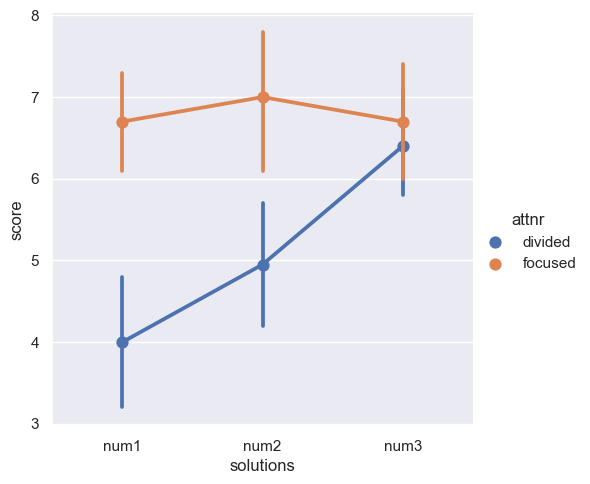

In [29]:
sns.catplot(data=anagrams_long, x="solutions", y="score", hue="attnr", kind="point")

### Further reading and take-home points
테이블 형식 데이터 구조에 대한 자세한 내용은 Hadley Wickham 의 "Tidy Data" 문서를 참조

Seaborn은 백서에 정의된 것과 약간 다른 개념 집합을 사용

논문에서는 tidyness를 주로 Long-form의 구조와 연결하지만 Seaborn에서는 Dataset의 변수와 테이블의 차원 사이에 명확한 매핑이 있는 "tidy wide-form" 데이터와 그러한 매핑이 존재하지 않는 "messy data"를 구분함

Long-form의 구조에는 분명한 이점이 있음

Dataset의 변수를 plot의 역할에 명시적으로 할당하여 figure를 만들 수 있으며 세 개 이상의 변수로 그렇게 할 수 있음

가능한 경우 진지하게 분석을 시작할 때 Long-form 구조로 데이터를 나타내도록 하자

Seaborn 문서의 대부분의 예제는 Long-form 데이터를 사용함

그러나 Dataset를 넓게 유지하는 것이 더 자연스러운 경우에도 Seaborn이 계속 유용할 수 있음을 기억하자